# Composite mass tracks in asari

- Goal: illustration of the concept of composite mass tracks in asari
- Citation: Li, S., Siddiqa, A., Thapa, M., Chi, Y. and Zheng, S., 2023. Trackable and scalable LC-MS metabolomics data processing using asari. Nature Communications, 14(1), p.4113. (https://www.nature.com/articles/s41467-023-39889-1)
- Original repo: https://github.com/shuzhao-li-lab/asari

### Background
Similar set of peaks are presenet across samples. Instead of doing peak detection in each sample, their signals are combined into a composite mass track per m/z region and peak detection is done on the composite mass tracks.
This greatly improves computing efficiency for large studies, reduces errors in peak correspondence across samples, and results in better peak detection for weak signals.
The result can be negatively affected by bad retention time alignment. But retention time alignment is a separate problem, and it does not have more impact to the asari approach than to XCMS or other approaches.

The demo data are MT01 dataset, processed as:

`>>> asari process --input /Users/shuzhao/bulk/MT01 --output MT01 --ppm 5`

In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt

datadir = 'asari_project_MT01_51162751'

Directory structure:
```
    asari_project_MT01_51162751
    ├── Annotated_empricalCompounds.json
    ├── Feature_annotation.tsv
    ├── export
    │   ├── _mass_grid_mapping.csv
    │   ├── cmap.pickle
    │   ├── full_Feature_table.tsv
    │   └── unique_compound__Feature_table.tsv
    ├── pickle
    │   ├── Blank_20210803_003.pickle
    │   ├── Blank_20210803_005.pickle
    │   ├── MSplate10_pgpB_b1278_G5_platePN_rep2_HEAT_GEIII_0-829_1125.pickle
    │   ├── MT_20210803_003K-Qstd.pickle
    │   ├── MT_20210803_005-NIST.pickle
    │   ├── MT_20210803_051.pickle
    │   ├── MT_20210803_089-Qstd.pickle
    │   ├── MT_20210803_091.pickle
    │   ├── MT_20210803_139.pickle
    │   └── MT_20210803_181.pickle
    ├── preferred_Feature_table.tsv
    └── project.json
```

In [2]:
# load composite map
cmap = pickle.load( open(os.path.join(datadir, 'export', 'cmap.pickle'), 'rb') )

In [3]:
cmap.keys()

dict_keys(['_number_of_samples_', 'rt_length', 'dict_scan_rtime', 'list_mass_tracks', 'MassGrid'])

In [4]:
# example mass track
cmap['list_mass_tracks'][583]

{'id_number': 583,
 'mz': 137.04570511938525,
 'intensity': array([106967,  64100,  65847, ...,      0,      0,      0])}

In [5]:
def plotk(track, color='m', start=100, end=400, yticks=[0, 5e7, 1e8]):
    plt.figure(figsize=(8, 4))
    X = range(start, end)
    Y = track['intensity'][start: end]
    plt.plot(X, Y, color=color, marker='o', markersize=4, linestyle='dashed')
    plt.yticks(yticks)

### We plot out composite track 583 as an example

The composite plot shows signals cumulated from all samples.

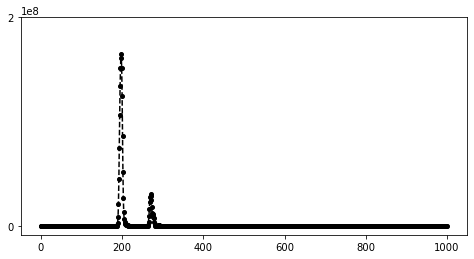

In [6]:
plotk(cmap['list_mass_tracks'][583], color='k', start=00, end=1000, yticks=[0, 2e8])

The composite mass tracks in CMAP are cumulated signals from all samples. 

**Now we look up how a composite mass track corresponds to the mass track in individual samples.**

In [7]:
# read CMAP - the file _mass_grid_mapping.csv records how mass tracks are mapped 
# Same information is stored as dictionaries in cmap['MassGrid']
cmap = pd.read_csv(os.path.join(datadir, 'export', '_mass_grid_mapping.csv'), index_col=0)
cmap

mz  Blank_20210803_003  Blank_20210803_005  \
0       80.947788                 NaN                 NaN   
1       80.987470                 NaN                 NaN   
2       80.988352                 NaN                 1.0   
3       81.044663                 0.0                 2.0   
4       81.520508                 1.0                 3.0   
...           ...                 ...                 ...   
13850  886.632497                 NaN                 NaN   
13851  959.518341                 NaN                 NaN   
13852  986.504486                 NaN                 NaN   
13853  997.624420                 NaN                 NaN   
13854  203.324853                 NaN                 NaN   

       MSplate10_pgpB_b1278_G5_platePN_rep2_HEAT_GEIII_0-829_1125  \
0                                                    NaN            
1                                                    NaN            
2                                                    NaN            
3                                                    NaN            
4                                                    NaN            
...                                                  ...            
13850                                                NaN            
13851                                                NaN            
13852                                                NaN            
13853                                                NaN            
13854                                                NaN            

       MT_20210803_003K-Qstd  MT_20210803_005-NIST  MT_20210803_051  \
0                        0.0                   1.0              0.0   
1                        NaN                   NaN              NaN   
2                        1.0                   2.0              1.0   
3                        2.0                   3.0              2.0   
4                        3.0                   4.0              3.0   
...                      ...                   ...              ...   
13850                    NaN                   NaN              NaN   
13851                    NaN                   NaN              NaN   
13852                    NaN                   NaN              NaN   
13853                    NaN                   NaN              NaN   
13854                    NaN                   NaN              NaN   

       MT_20210803_089-Qstd  MT_20210803_091  MT_20210803_139  MT_20210803_181  
0                       0.0              0.0              0.0              0.0  
1                       1.0              1.0              NaN              NaN  
2                       2.0              2.0              1.0              1.0  
3                       3.0              3.0              2.0              2.0  
4                       4.0              4.0              3.0              3.0  
...                     ...              ...              ...              ...  
13850                   NaN              NaN              NaN           6863.0  
13851                   NaN              NaN              NaN           6917.0  
13852                   NaN              NaN              NaN           6924.0  
13853                   NaN              NaN              NaN           6932.0  
13854                   NaN              NaN              NaN           6945.0  

[13855 rows x 11 columns]

In [8]:
# Use 3 samples for illustrration
myfiles = ['MT_20210803_089-Qstd', 'MT_20210803_139', 'MT_20210803_181']

In [9]:
cmap[myfiles].iloc[583, :]

MT_20210803_089-Qstd    583.0
MT_20210803_139         588.0
MT_20210803_181         572.0
Name: 583, dtype: float64

The above cell shows the mass track number in each sample in myfiles, corresponding to number 583 in the composoite map.

They should be integer. Pandas loads as float because we didn't ask it to force dtype.

Next, we load mass tracks from each of the three samples from intermedaite pickle files asari saved during processing.

In [10]:
data = []
for f in myfiles:
    with open(os.path.join(datadir, 'pickle', f+'.pickle'), 'rb') as O:
        data.append(pickle.load( O ))
    

In [11]:
# check what's in the first sample data
data[0].keys()

dict_keys(['sample_id', 'input_file', 'ion_mode', 'max_scan_number', 'list_mass_tracks', 'anchor_mz_pairs', 'number_anchor_mz_pairs'])

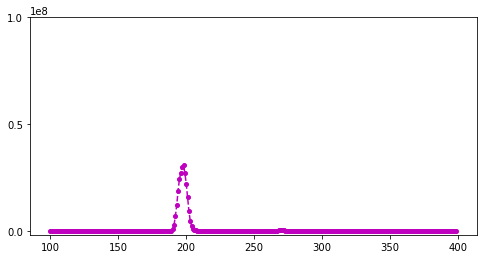

In [12]:
# first sample, MT_20210803_089-Qstd
plotk(data[0]['list_mass_tracks'][583],
              color='m', start=100, end=400, yticks=[0, 0.5e8, 1e8])

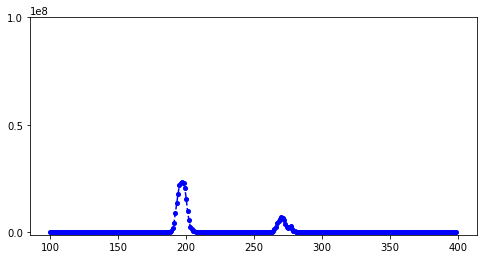

In [13]:
# second sample, MT_20210803_139
plotk(data[1]['list_mass_tracks'][588],
              color='b', start=100, end=400, yticks=[0, 0.5e8, 1e8])

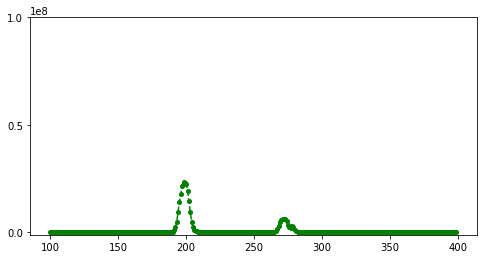

In [14]:
# third sample, MT_20210803_181
plotk(data[2]['list_mass_tracks'][572],
              color='g', start=100, end=400, yticks=[0, 0.5e8, 1e8])

### Let's add up the signals from all 3 samples. That's how a composite mass track is constructed.

In asari, the sample data go through retention time calibration first. We skip it here.

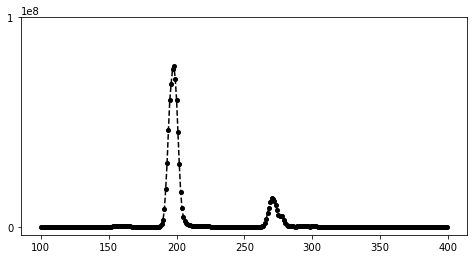

In [15]:
composite = {'intensity': data[0]['list_mass_tracks'][583]['intensity'][:400] + data[1
                                ]['list_mass_tracks'][588]['intensity'][:400] + data[2
                                ]['list_mass_tracks'][572]['intensity'][:400] }

plotk(composite,
              color='k', start=100, end=400, yticks=[0, 1e8])

The two peaks here are reported as features F3345 and F3346 on parent track 583.

In the asari feature table, there's a third peak due to cumulative signals from other samples on the same track.

After peak detection on composite mass tracks, the corresponding regions of each sample are looked up to get peak area values.